# 1.데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

train = pd.read_csv(r'D:\데이콘\data\parking\train.csv')
test  = pd.read_csv(r'D:\데이콘\data\parking\test.csv')

# 2. 데이터 전처리

In [7]:
print(train.shape)
print(test.shape)
print(train.info())

(2952, 15)
(1022, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-n

In [8]:
#%% 중복제거
train = train.drop_duplicates()
test = test.drop_duplicates()

In [9]:
#%% 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [11]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2632.000000,2632.000000,2632.000000,2632.000000,2.328000e+03,2.319000e+03,2477.000000,2628.000000,2632.000000,2632.000000
mean,854.095365,46.091303,114.365881,13.316869,2.682653e+07,1.955080e+05,0.158256,3.686454,636.769377,600.843085
std,484.047918,32.559242,135.742354,10.631196,2.171244e+07,1.307436e+05,0.417684,2.684362,394.668932,431.630701
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,504.000000,36.500000,26.000000,4.000000,1.441800e+07,1.105500e+05,0.000000,2.000000,334.750000,296.000000
50%,773.000000,46.405000,78.000000,13.000000,2.080100e+07,1.610200e+05,0.000000,3.000000,551.000000,520.000000
75%,1065.000000,51.850000,154.000000,20.000000,3.244300e+07,2.359800e+05,0.000000,4.000000,871.000000,795.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [13]:
train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0


In [18]:
# 결측치 확인
train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,304


In [22]:
train[train.임대보증금.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [20]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    285
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [21]:
train[train.임대보증금.notnull()].공급유형.value_counts()

국민임대         1722
공공임대(10년)     203
행복주택          199
영구임대          149
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [23]:
# 임대상가 데이터 제거
store = train[train['공급유형']=='임대상가'].단지코드.unique()
train = train[train['공급유형']!='임대상가']

set1 = set(store)
set2 = set(train['단지코드'].unique())
set1 == set1.intersection(set2)

True

In [24]:
# 상가가 있는 아파트에는 상가 변수 추가
store2=[0]*len(train)
for i in range(len(train)):
    if list(train['단지코드'])[i] in list(store):
        store2[i]=1
    else:
        store2[i]=0
store2
train['상가'] = store2

train[train['상가']==1].단지코드.unique()

array(['C1925', 'C1874', 'C2416', 'C2621', 'C1616', 'C1704', 'C2258',
       'C2038', 'C1859', 'C1722', 'C2190', 'C1476', 'C1983', 'C2135',
       'C2034', 'C1109', 'C2289', 'C2597', 'C2310', 'C2132', 'C1439',
       'C1899', 'C1056', 'C2644', 'C1206', 'C1775', 'C1790', 'C2109',
       'C1698', 'C1004', 'C1875', 'C2212', 'C2571'], dtype=object)

In [25]:
#%% 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수 NA -> 0으로 대체
subway_null_codes = train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

bus_null_codes = train[train['도보 10분거리 내 버스정류장 수'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(bus_null_codes), '도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

In [27]:
#%% 확인
train[train.임대보증금.isnull()].단지코드.unique()

array(['C1350', 'C1326', 'C1786', 'C2186'], dtype=object)

In [28]:
train[train.임대보증금.isnull()].공급유형.value_counts()

국민임대    8
공공분양    7
행복주택    4
Name: 공급유형, dtype: int64

In [29]:
train[train.임대료.isnull()].공급유형.value_counts()
#train[train.임대료.notnull()].공급유형.value_counts()

장기전세    9
국민임대    8
공공분양    7
행복주택    4
Name: 공급유형, dtype: int64

In [30]:
train[train.단지코드=='C1350']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2338,C1350,1401,아파트,대전광역시,공공임대(10년),51.99,106,2.0,A,28013000.0,408600.0,0.0,6.0,1636.0,2315.0,0
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000.0,519350.0,0.0,6.0,1636.0,2315.0,0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000.0,516130.0,0.0,6.0,1636.0,2315.0,0


In [31]:
train[train.단지코드=='C1326']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0


In [32]:
train[train.단지코드=='C1786']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2684,C1786,480,아파트,강원도,행복주택,36.91,92,25.0,J,30560000.0,145160.0,0.0,3.0,338.0,345.0,0


In [33]:
train[train.단지코드=='C2186']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2908,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2909,C2186,924,아파트,대구광역시,국민임대,46.51,188,0.0,H,25981000.0,248630.0,0.0,8.0,664.0,744.0,0
2910,C2186,924,아파트,대구광역시,영구임대,26.37,219,0.0,C,13126000.0,105870.0,0.0,8.0,664.0,744.0,0
2911,C2186,924,아파트,대구광역시,영구임대,26.54,13,0.0,C,13164000.0,106190.0,0.0,8.0,664.0,744.0,0


In [34]:
# 공급유형 장기전세인 단지 임대료는 0으로
indi = np.where(train.공급유형=='장기전세')[0]
indi = indi.tolist()

for i in indi:
    train.iloc[i,10] = 0

In [36]:
#%%% 더미변수 만들기
train2 = train.drop(['단지코드'],axis=1)
train2 = pd.get_dummies(train2)
train2

#%% 임대보증금, 임대료 회귀분석 이용한 결측치 처리

y1 = train2.dropna(axis=0)[['임대보증금']]
y2 = train2.dropna(axis=0)[['임대료']]
x1 = train2.drop(['임대보증금','등록차량수'],axis=1).dropna(axis=0).drop(['임대료'],axis=1)
x2 = train2.drop(['임대료','등록차량수'],axis=1).dropna(axis=0)


from sklearn import linear_model
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg_model1 = lin_reg.fit(x1, y1)
y1_pred = lin_reg_model1.predict(train2.drop(['임대보증금','등록차량수','임대료'],axis=1))
len(y1_pred)

train2['임대보증금'] = np.where(train2['임대보증금'].isnull(), 
                           pd.Series(y1_pred.flatten()), train2['임대보증금'])

lin_reg_model2 = lin_reg.fit(x2, y2)
y2_pred = lin_reg_model2.predict(train2.drop(['임대료','등록차량수'],axis=1))

train2['임대료'] = np.where(train2['임대료'].isnull(), 
                           pd.Series(y2_pred.flatten()), train2['임대료'])

train2.isnull().sum().to_frame()

,0
총세대수,0
전용면적,0
전용면적별세대수,0
공가수,0
임대보증금,0
임대료,0
도보 10분거리 내 지하철역 수(환승노선 수 반영),0
도보 10분거리 내 버스정류장 수,0
단지내주차면수,0
등록차량수,0


In [37]:
# ####test set ####
test.info()
test.isnull().sum()
#
test[test.자격유형.isnull()]
test[test.단지코드=='C2411']
test[test.단지코드=='C2253']

#자격유형 결측치 처리 (확인해서 처리함)
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

# 임대상가 데이터 제거
store3 = test[test['공급유형']=='임대상가'].단지코드.unique()
test = test[test['공급유형']!='임대상가']

set1 = set(store3)
set2 = set(test['단지코드'].unique())
set1 == set1.intersection(set2)

# 상가 변수 추가
store4=[0]*len(test)
for i in range(len(test)):
    if list(test['단지코드'])[i] in list(store3):
        store4[i]=1
    else:
        store4[i]=0
store4
test['상가'] = store4

test[test['상가']==1].단지코드.unique()

test2 = test.drop(['단지코드'],axis=1)
test2 = pd.get_dummies(test2)
test2

# 임대보증금, 임대료 회귀분석 이용한 결측치 처리

z1 = test2.dropna(axis=0)[['임대보증금']]
z2 = test2.dropna(axis=0)[['임대료']]
w1 = test2.drop(['임대보증금'],axis=1).dropna(axis=0).drop(['임대료'],axis=1)
w2 = test2.drop(['임대료'],axis=1).dropna(axis=0)


from sklearn import linear_model
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg_model3 = lin_reg.fit(w1, z1)
z1_pred = lin_reg_model3.predict(test2.drop(['임대보증금','임대료'],axis=1))

test2['임대보증금'] = np.where(test2['임대보증금'].isnull(), 
                           pd.Series(z1_pred.flatten()), test2['임대보증금'])

lin_reg_model4 = lin_reg.fit(w2, z2)
z2_pred = lin_reg_model4.predict(test2.drop(['임대료'],axis=1))

test2['임대료'] = np.where(test2['임대료'].isnull(), 
                           pd.Series(z2_pred.flatten()), test2['임대료'])

test2.isnull().sum().to_frame()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          949 non-null    object 
 1   총세대수                          949 non-null    int64  
 2   임대건물구분                        949 non-null    object 
 3   지역                            949 non-null    object 
 4   공급유형                          949 non-null    object 
 5   전용면적                          949 non-null    float64
 6   전용면적별세대수                      949 non-null    int64  
 7   공가수                           949 non-null    float64
 8   자격유형                          947 non-null    object 
 9   임대보증금                         829 non-null    float64
 10  임대료                           829 non-null    float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  949 non-null    float64
 12  도보 10분거리 내 버스정류장 수            949 non-null    float64
 13  단지내주

,0
총세대수,0
전용면적,0
전용면적별세대수,0
공가수,0
임대보증금,0
임대료,0
도보 10분거리 내 지하철역 수(환승노선 수 반영),0
도보 10분거리 내 버스정류장 수,0
단지내주차면수,0
상가,0


C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing 

C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing 

C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ddio3\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51648 missing from curre

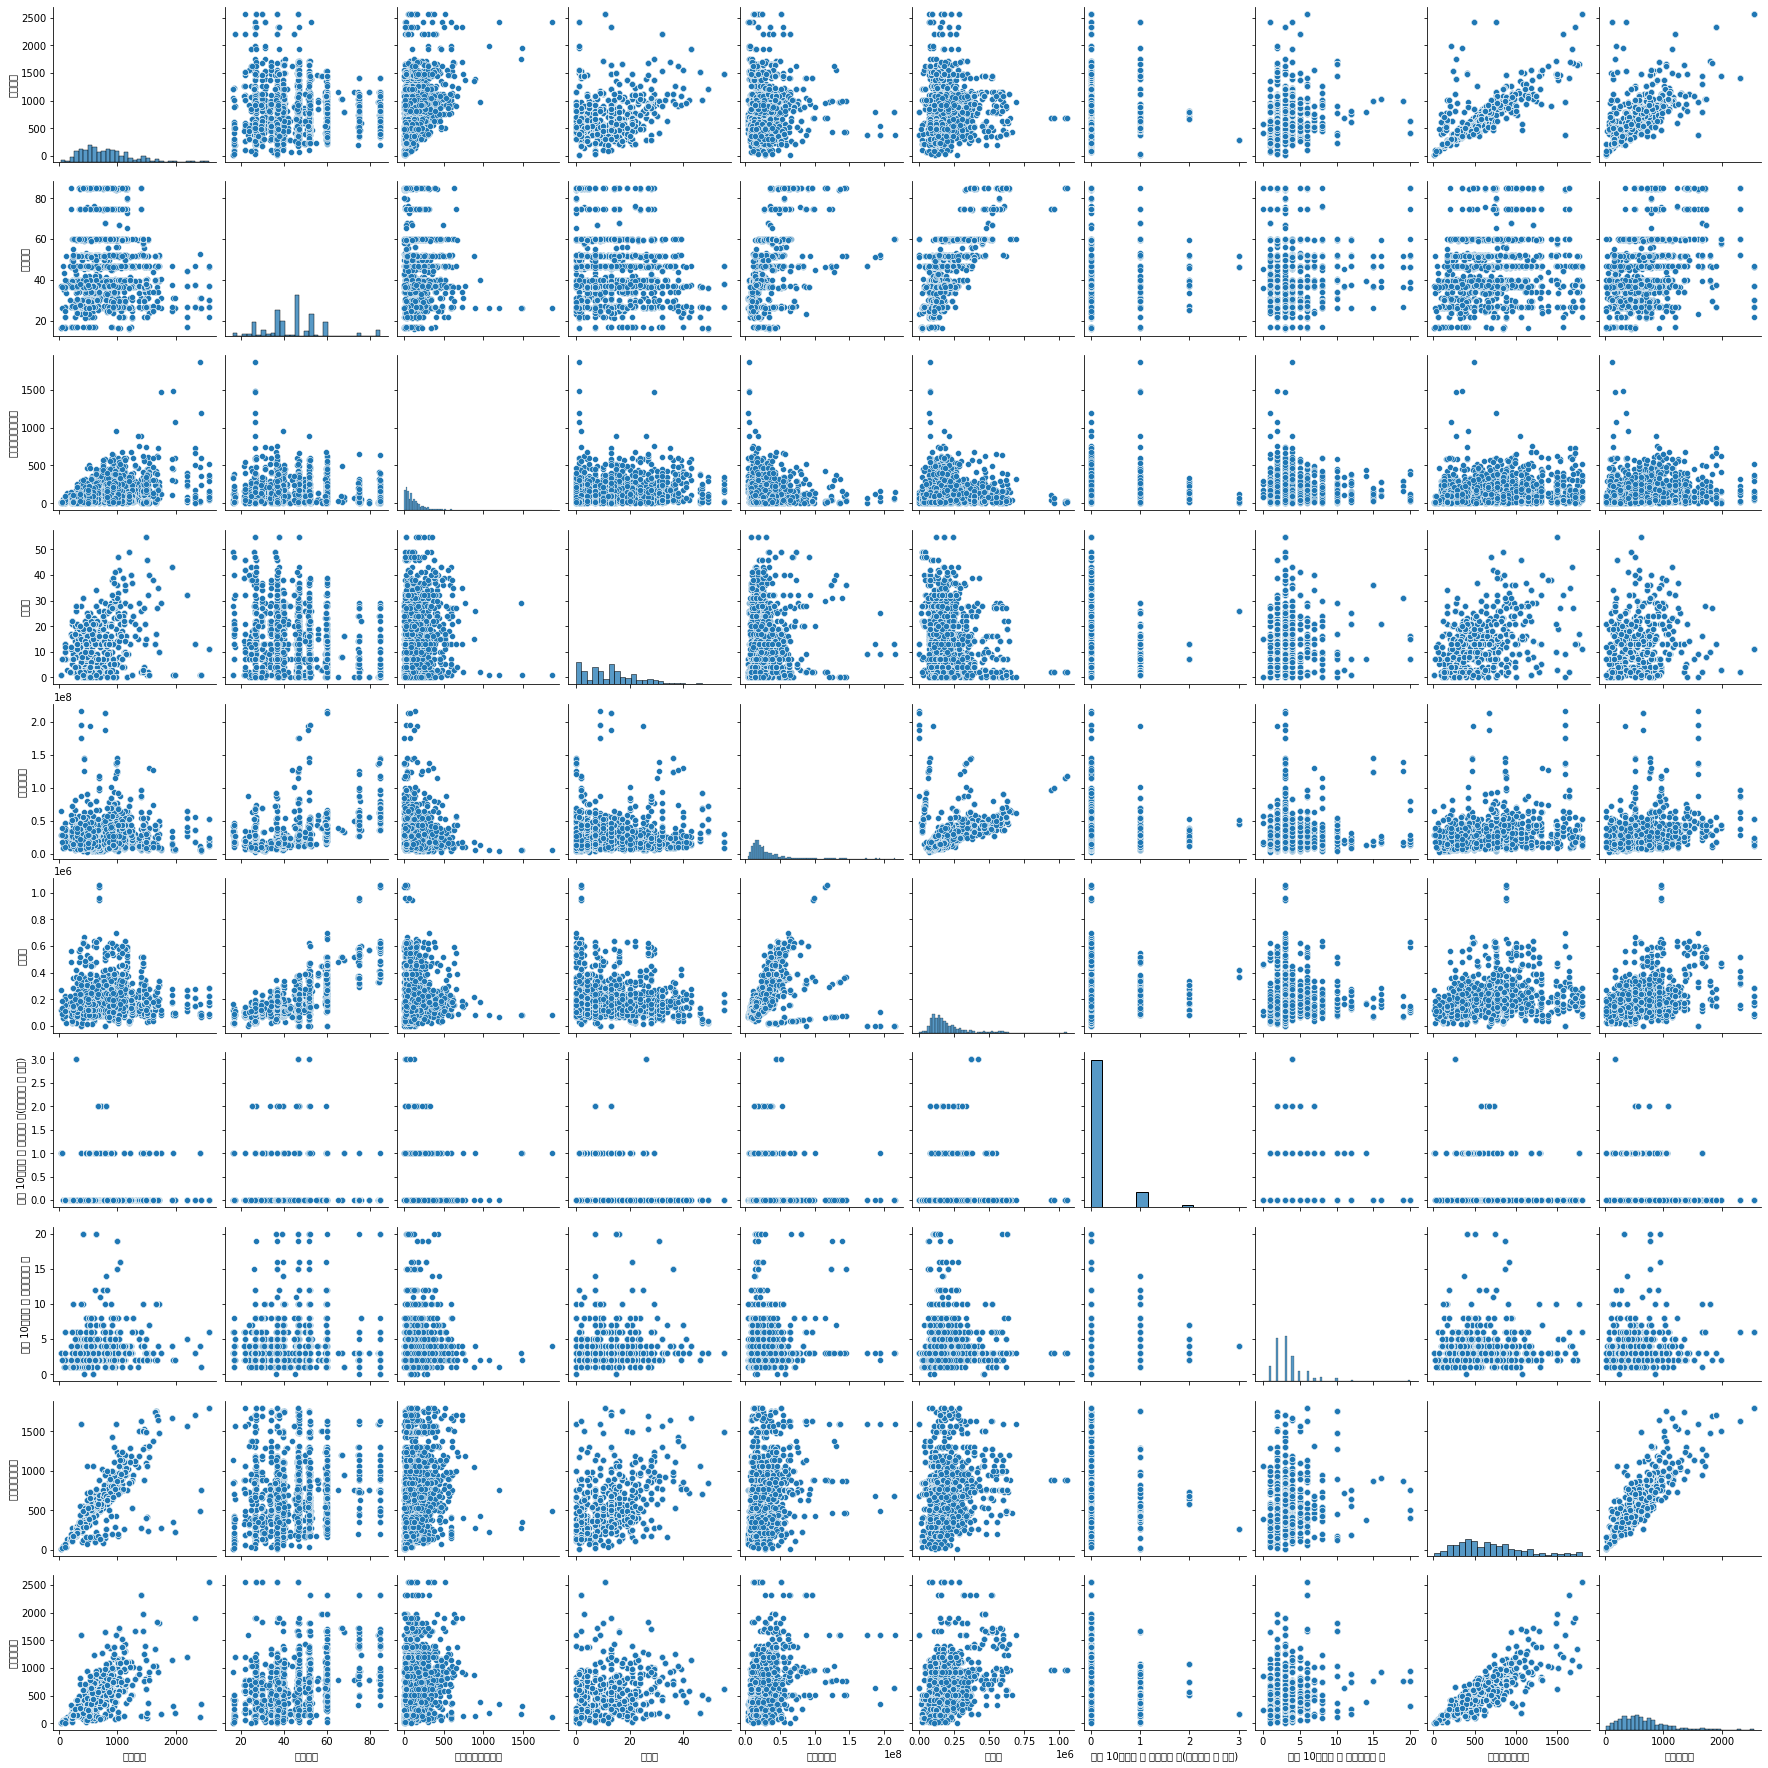

In [39]:
# pair
sns.pairplot(train2.iloc[:,0:10])

<AxesSubplot:>

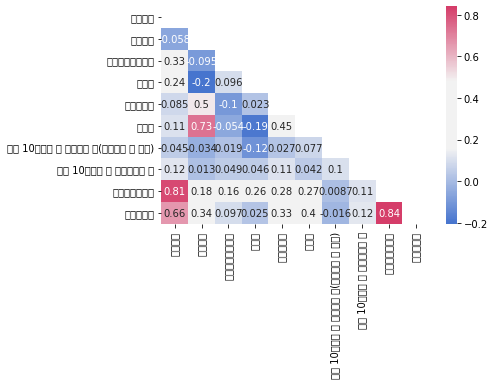

In [40]:
# corrplot
corr = train2.iloc[:,0:10].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

heatmap 축 label: 
'총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)', 
'도보 10분거리 내 버스정류장 수', '단지내주차면수','등록차량수' 

In [ ]:
# 이상치는 boxplot으로 볼 수 있는데, 데이터 성격 상 이상치라고 생각안하고 분석진행

sns.boxplot(data=[train2['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],train2['도보 10분거리 내 버스정류장 수']],color='red')
#sns.boxplot(data=train2['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],color='red')

In [42]:
#단지코드별로 합쳐서 분석용 training set 만들기
mtrain = train2[['총세대수','공가수','임대보증금','임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수','등록차량수']]
mtrain['단지코드'] = train['단지코드']
mtrain
mgtrain = mtrain.groupby('단지코드').mean()


strain = train2.iloc[:,28:]
strain['상가'] = train2['상가']
strain['임대건물구분_아파트'] = train2['임대건물구분_아파트']
strain['전용면적'] = train2['전용면적']
strain['단지코드'] = train['단지코드']
strain
sgtrain = strain.groupby('단지코드').sum()

area = train[['단지코드','지역']]
area = area.drop_duplicates()
train3 = pd.merge(mgtrain,sgtrain,on='단지코드')
train_f = pd.merge(train3,area,how='left',left_on='단지코드',right_on='단지코드')
# %%
age = pd.read_csv(r'D:\데이콘\data\parking\age_gender_info.csv')
car_age = age.iloc[:,7:17].sum(axis=1)
car_age = pd.DataFrame(data=car_age,columns=['차인구비율'])
car_age['지역'] = age['지역']
train_final= pd.merge(train_f,car_age,how='left',left_on='지역',right_on='지역')

C:\Users\ddio3\AppData\Local\Temp/ipykernel_16340/1430660867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtrain['단지코드'] = train['단지코드']


In [41]:
#단지코드별로 합쳐서 분석용 test set 만들기
mtest = test2[['총세대수','공가수','임대보증금','임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수']]
mtest['단지코드'] = test['단지코드']
mtest
mgtest = mtest.groupby('단지코드').mean()

stest = test2.iloc[:,26:]
stest['상가'] = test2['상가']
stest['임대건물구분_아파트'] = test2['임대건물구분_아파트']
stest['전용면적'] = test2['전용면적']
stest['단지코드'] = test['단지코드']
stest
sgtest = stest.groupby('단지코드').sum()

area = test[['단지코드','지역']]
area = area.drop_duplicates()
test3 = pd.merge(mgtest,sgtest,on='단지코드')
test_f = pd.merge(test3,area,how='left',left_on='단지코드',right_on='단지코드')

#
age = pd.read_csv(r'D:\데이콘\data\parking\age_gender_info.csv')
car_age = age.iloc[:,7:17].sum(axis=1)
car_age = pd.DataFrame(data=car_age,columns=['차인구비율'])
car_age['지역'] = age['지역']
test_final= pd.merge(test_f,car_age,how='left',left_on='지역',right_on='지역')

#
test_final['자격유형_F'] = test_final['자격유형_B']=test_final['자격유형_O']=0
test_final['공급유형_공공분양'] = test_final['공급유형_공공임대(5년)'] =test_final['공급유형_장기전세'] =0

C:\Users\ddio3\AppData\Local\Temp/ipykernel_16340/389829253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtest['단지코드'] = test['단지코드']


In [43]:
# 분석에 필요없는 변수 제거해주고 설명변수, 반응변수 나눠주기
x_train = train_final.drop(['등록차량수','단지코드','지역'],axis=1)
y_train = train_final['등록차량수']
x_test = test_final.drop(['단지코드','지역'],axis=1)

# 3. 데이터 모델링

In [44]:
# modeling - 사용모델 : ridge, lasso, xgb ,randomforest
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

ridge_reg = Ridge(alpha=8)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
rf_reg = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)

In [49]:
#
from sklearn.model_selection import KFold

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        model.fit(X_tr , y_tr)       
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    return train_fold_pred , test_pred_mean

In [52]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = x_train.values
X_test_n = x_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 


C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00694e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24817e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11146e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.32482e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.02637e-17): result may not be acc

	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [54]:
from sklearn.metrics import mean_squared_error
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, rf_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
train_pred = meta_model_lasso.predict(Stack_final_X_train)
mse = mean_squared_error(y_train , train_pred)
rmse = np.sqrt(mse)
print('train data의 최종 RMSE 값:', rmse)
test_pred = meta_model_lasso.predict(Stack_final_X_test)

train data의 최종 RMSE 값: 185.9010261330504


C:\Users\ddio3\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5072042.809866378, tolerance: 6452.652833096927
  model = cd_fast.enet_coordinate_descent(
